<a href="https://colab.research.google.com/github/carlos-junior2/K-Means/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Implementação (Hardcore)

## Preparando o ambiente

Importando bibliotecas

In [28]:
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
import numpy as np
import random
import io
from sklearn.metrics import silhouette_score

Carregando o dataset

In [29]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Organizando os dados

In [30]:
iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/K-Means/Iris.csv')
df = pd.DataFrame(iris)
df = df.rename(columns={'SepalWidthCm': 'y', 'PetalLengthCm': 'x'})
df.head()

,Id,SepalLengthCm,y,x,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Salva as colunas específicas do csv em uma lista

In [31]:
# Selecionando as features 'x' e 'y' para o k-means
X = df[['x', 'y']].values.tolist()

## Funções independentes


Realiza o cálculo da distancia euclidiana.

\begin{align}
        \text{} d(x,y)= &\sqrt{\sum_{i=0}^n (xi-yi)^2 }    \\[1em]
\end{align}



In [32]:
def distEuclid (ponto1, ponto2):
  return (((ponto1.get('x') - ponto2.get('x'))**2 + (ponto1.get('y') - ponto2.get('y'))**2)**0.5)

Pontos para teste da função distEuclid()

In [33]:
ponto1 = {'x': 2, 'y': 5}
ponto2 = {'x': 3, 'y': 4}
distEuclid(ponto1, ponto2)

1.4142135623730951

Seleciona aleatoriamente k pontos como centróides iniciais.

In [34]:
def inicializa_centroides(dados, k):
    indices_centroides = random.sample(range(len(dados)), k)
    centroides = [dados[i] for i in indices_centroides]
    return centroides

Atribui cada ponto de dados ao centróide mais próximo.

In [35]:
def atribui_clusters(dados, centroides):
    clusters = []
    for ponto in dados:
        distancias = [distEuclid({'x':ponto[0], 'y':ponto[1]}, {'x':centroide[0], 'y':centroide[1]}) for centroide in centroides]
        indice_cluster = distancias.index(min(distancias))
        clusters.append(indice_cluster)
    return clusters

Calcula os novos centróides com base nas atribuições atuais dos clusters.

In [36]:
def atualiza_centroides(dados, clusters, k):
    centroides = [[] for _ in range(k)]
    for i, ponto in enumerate(dados):
        indice_cluster = clusters[i]
        centroides[indice_cluster].append(ponto)

    novos_centroides = []
    for pontos_cluster in centroides:
        if pontos_cluster:
            novos_centroides.append(np.mean(pontos_cluster, axis=0).tolist())
        else:
            # Se um cluster estiver vazio, mantenha o centróide anterior
            novos_centroides.append(centroides[centroides.index(pontos_cluster)])

    return novos_centroides

Executa a clusterização k-means.

In [37]:
def kmeans(dados, k, max_iteracoes=100):
    centroides = inicializa_centroides(dados, k)
    for _ in range(max_iteracoes):
        clusters = atribui_clusters(dados, centroides)
        novos_centroides = atualiza_centroides(dados, clusters, k)
        if novos_centroides == centroides:
            break  # Para se os centróides não mudarem
        centroides = novos_centroides
    return clusters, centroides

## Executando o K-means

### Para k = 3

In [38]:
# Aplicando o k-means
k = 3  # Número de clusters
clusters, centroids = kmeans(X, k)

# Adicionando a coluna 'cluster' ao DataFrame original
df['cluster'] = clusters

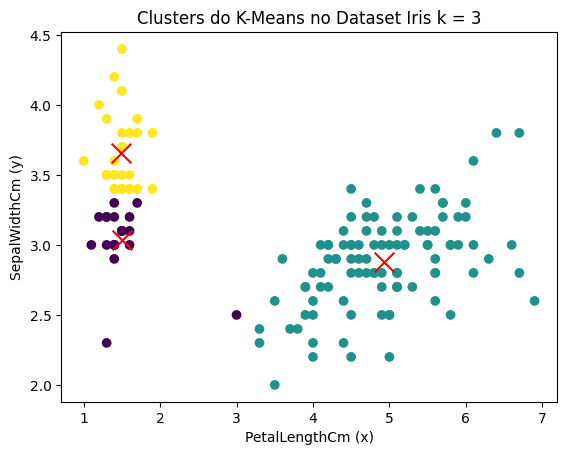

In [39]:
plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis')
plt.scatter([c[0] for c in centroids], [c[1] for c in centroids], marker='x', s=200, c='red') # Centróides
plt.xlabel('PetalLengthCm (x)')
plt.ylabel('SepalWidthCm (y)')
plt.title('Clusters do K-Means no Dataset Iris k = 3')
plt.show()

`Cálculo do Silhouette Score para k = 3`


In [40]:
score = silhouette_score(X, clusters)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.586037636812077


### Para k = 5

In [41]:
# Aplicando o k-means
k = 5  # Número de clusters
clusters, centroids = kmeans(X, k)

# Adicionando a coluna 'cluster' ao DataFrame original
df['cluster'] = clusters

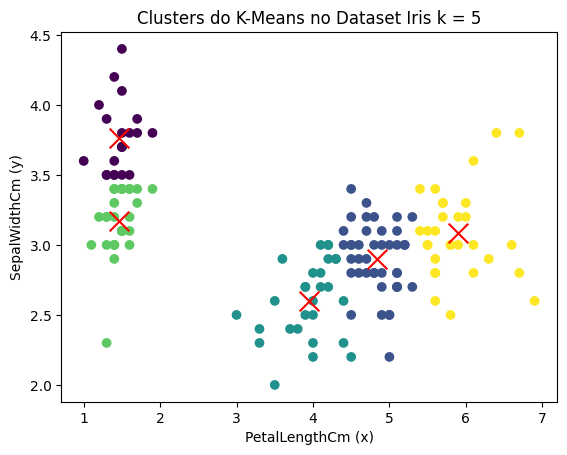

In [42]:
plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis')
plt.scatter([c[0] for c in centroids], [c[1] for c in centroids], marker='x', s=200, c='red') # Centróides
plt.xlabel('PetalLengthCm (x)')
plt.ylabel('SepalWidthCm (y)')
plt.title('Clusters do K-Means no Dataset Iris k = 5')
plt.show()

`Cálculo do Silhouette Score para k = 5`

In [43]:
score = silhouette_score(X, clusters)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.4260172338096438


# Implementação usando Scikit-Learn

## Preparando o Ambiente

Importando Bibliotecas

In [44]:
# Importando as bibliotecas necessárias
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Organizando os dados

In [45]:
# Carregando a base de dados Iris
iris = load_iris()
X = iris.data  # Dados das características

## Aplicando o Algoritmo

### k = 3

In [75]:
# Aplicando o algoritmo K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

Obtenha as previsões de cluster

In [76]:
y_kmeans = kmeans.predict(X)

Adicionando as previsões ao DataFrame para visualização

In [77]:
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['Cluster'] = y_kmeans

Visualizando os clusters usando gráfico de dispersão

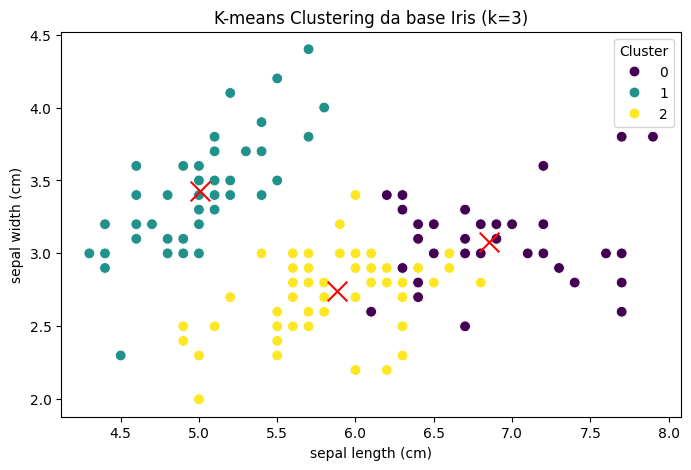

In [78]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=iris_df[iris.feature_names[0]], y=iris_df[iris.feature_names[1]],
                hue=iris_df['Cluster'], palette='viridis', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='x', s=200, c='red', label='Centroids')

plt.title("K-means Clustering da base Iris (k=3)") # Update title
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

Cálculo do Silhouette Score para k=3

In [79]:
score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.551191604619592


### k = 5

In [70]:
# Aplicando o algoritmo K-means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

Obtenha as previsões de cluster

In [71]:
y_kmeans = kmeans.predict(X)

Adicionando as previsões ao DataFrame para visualização

In [72]:
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['Cluster'] = y_kmeans

Visualizando os clusters usando gráfico de dispersão

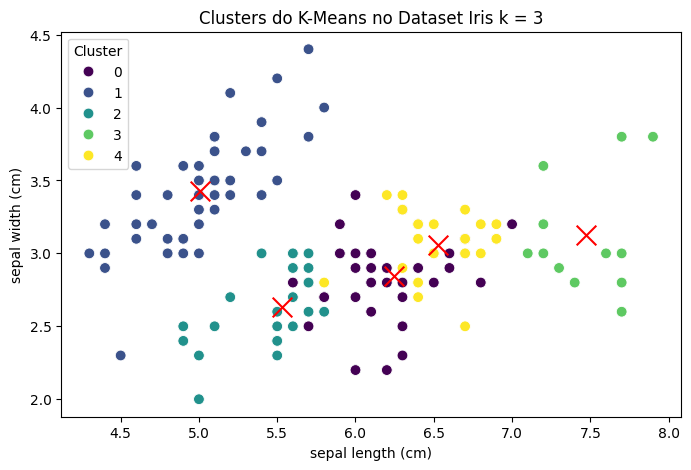

In [73]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=iris_df[iris.feature_names[0]], y=iris_df[iris.feature_names[1]],
                hue=iris_df['Cluster'], palette='viridis', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='x', s=200, c='red', label='Centroids') # Add centroids
plt.title("Clusters do K-Means no Dataset Iris k = 3")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

Cálculo do Silhouette Score para k=5

In [74]:
score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.4930804067193521
